In [31]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gamma,norm,rayleigh,describe,scoreatpercentile
import pylab as pl
get_ipython().magic(u'matplotlib inline')

In [32]:
grid_data=pd.read_csv('results_GIS_SF_2.csv')
people_range=range(100,10600,500)
#select grid where pop_density>0
grid_data=grid_data[grid_data.pop_density_current != 0]

In [33]:
#import data
Electricity_EF_data = pd.read_csv('Electricity_EF_data.csv')
pipe_construction_data = pd.read_csv('pipe_construction_data.csv')
pipe_diameter_data = pd.read_csv('pipe_diameter_data2.csv')
pipe_maintenance_data = pd.read_csv('pipe_maintenance_data.csv')
pump_construction_data = pd.read_csv('pump_construction_data.csv')
slope_index_data = pd.read_csv('slope_index_data.csv')
steel_data = pd.read_csv('steel_data.csv')
transportation_data = pd.read_csv('transportation_data.csv')
treatment_data = pd.read_csv('treatment_data.csv')


#user set parameters
demand=0.2 #m3/person-day

Electric_Utility="SFPUC"
Electric_Utility_pipes="2010 CA Power Mix"
pipe_material="PE"
miles_to_disposal=30
miles_transport=50
discount=0.04
lifetime_treatment=25
lifetime=50
#pop_density=500 #people/km2
street_density=8000 #m/km2
pump_operating_fraction=0.8
storage_days=3
tank_height=3
retention_time=6 #h
consumption_pressure=20 #m


Treatment_operational_energy_m3=2.5 #MJ/m3
Treatment_capital_energy_m3=0.5 #MJ/m3
Treatment_operational_GHG_m3=0.25  #kgCO2/m3
Treatment_capital_GHG_m3= 0.07  #kgCO2/m3


#specify model parameters
electricity_cost=0.12 #$/kwh
specific_weight_water=9.807 #KN/m3
water_density=1000 #kg/m3
gravity=9.8 #m/s2
excavation_cost=4.6 #$/m3
excavation_energy=153 #MJ/m3
excavation_GHG=12 #kgCO2/m3
motor_efficiency=0.95
transport_cost=0.13 #$/ton-mile
transport_energy=8.16 #MJ/ton-mile
transport_GHG=0.656 #kgCo2/ton-mile
steel_cost=0.769 #$/kg
steel_GHG=1.3 #kgCO2/kg
steel_energy=17.5
steel_sheet_mass=186.9
steel_sheet_area=3.72
cement_energy=2820 #MJ/m3
cement_GHG=330 #kgCO2/m3
cement_cost=0.00005 #$/kg
reinf_concrete_energy=19 #Mj/$
reinf_concrete_GHG=1.794 #kgCo2/$
reinf_concrete_cost=115 # $/m3
media_filtration_energy=0.05 #kWh/m3 (Opportunities and Economics of water reuse)
flocculation_energy=0.05 #kWh/m3 of tank volume (Lee,2010)

#specify treatment parameters
MBR_GHG=0.23
sludge_mass=0.1 #kg/m3 water treated
percent_fertilizer= 0.5 #percent of sludge disposed as fertilizer
percent_landfill= (1-percent_fertilizer) 
landfill_GHG=0.04
fertilizer_GHG=0
chlorine_energy=42 #MJ/kg
chlorine_GHG=0.74 #kg/kg
chlorine_mass=15 #mg/L
chlorine_retention_time=1 #h
Alum_density=120 #mg/L 
Alum_energy=0.91 #MJ/kg
Alum_GHG=0.07 #kgCO2/kg

RSF_rate=293 #m3/m2-day (Tchobanoglous small and decentralized)
RSF_sand_depth=0.6 #m (Tchobanoglous small and decentralized - deep bed sand) 

RSF_anthracite_depth=0.75
RSF_sand_density=1602 #kg/m3
RSF_sand_energy=0.147 #MJ/kg
RSF_sand_GHG=0.0104 #kgCO2/kg
RSF_anthracite_density=1100 #kg/m3
RSF_anthracite_energy=0.231 #MJ/kg
RSF_anthracite_GHG=0.06 #kgCO2/kg
flocculation_time=1 #hours
coagulation_time=0.3 #hours

Water_energy_intensity=1.12 #kWh/m3
Water_GHG_intensity=0.36 #kgCO2/m3

#Results
Scale_final=[]
grid_ID_final=[]

elevation_data_final=[]
pump_hp_final=[]
pipe_diameter_final=[]


Total_conveyance_capital_cost_final=[]
Total_conveyance_capital_GHG_final=[]
Total_conveyance_capital_energy_final=[]
Total_conveyance_operational_cost_final=[]
Total_conveyance_operational_GHG_final=[]
Total_conveyance_operational_energy_final=[]

Total_Treatment_Capital_cost_final=[]
Total_Treatment_Capital_energy_final=[]
Total_Treatment_Capital_GHG_final=[]
Total_Treatment_Operational_cost_final=[]
Total_Treatment_Operational_energy_final=[]
Total_Treatment_Operational_GHG_final=[]
Total_Treatment_energy_offsets=[]
Total_Treatment_GHG_offsets=[]

Total_Treatment_operational_energy_final=[]
Total_Treatment_capital_energy_final=[]
Total_Treatment_operational_GHG_final=[]
Total_Treatment_capital_GHG_final=[]

Total_Cost_final=[]
Total_Energy_final=[]
Total_GHG_final=[]


Pipe_capital_cost_final=[]
Pump_capital_cost_final=[]
Tank_capital_cost_final=[]
Pipe_capital_GHG_final=[]
Pump_capital_GHG_final=[]
Tank_capital_GHG_final=[]
Pipe_capital_energy_final=[]
Pipe_construction_energy_final=[]
Pipe_excavation_energy_final=[]
Pipe_transport_energy_final=[]
Pump_capital_energy_final=[]
Tank_capital_energy_final=[]
tank_const_energy_final=[]
tank_transport_energy_final=[]
pump_construction_energy_final=[]
pump_transport_energy_final=[]

Pipe_construction_GHG_final=[]
Pipe_excavation_GHG_final=[]
Pipe_transport_GHG_final=[]
Pump_capital_GHG_final=[]
Tank_capital_GHG_final=[]
tank_const_GHG_final=[]
tank_transport_GHG_final=[]
pump_construction_GHG_final=[]
pump_transport_GHG_final=[]

Pipe_operat_cost_final=[]
Pump_operat_cost_final=[]
Pipe_operat_GHG_final=[]
Pump_operat_GHG_final=[]
Pipe_operat_energy_final=[]
Pump_operat_energy_final=[]

MBR_Capital_energy_final=[]
MBR_Capital_GHG_final=[]
CoagFlocc_Capital_energy_final=[]
CoagFlocc_Capital_GHG_final=[]

MBR_Operational_energy_final=[]
MBR_Operational_GHG_final=[]
Chlorine_operational_energy_final=[]
Chlorine_operational_GHG_final=[]
RSF_Operational_energy_final=[]
RSF_Operational_GHG_final=[]

Sludge_transport_energy_final=[]
Sludge_transport_GHG_final=[]
Sludge_disposal_GHG_final=[]

Treatment_capital_energy_final=[]
Treatment_capital_GHG_final=[]
Treatment_operational_energy_final=[]
Treatment_operational_GHG_final=[]

RSF_capital_energy_final=[]
RSF_capital_GHG_final=[]

CoagFlocc_Capital_energy_final=[]
CoagFlocc_Capital_GHG_final=[]
CoagFlocc_Operational_energy_final=[]
CoagFlocc_Operational_GHG_final=[]
Chlorine_operational_energy_final=[]
Chlorine_operational_GHG_final=[]

Headloss_total=[]
Head_total=[]
Pressure_total=[]
dynamic_total=[]
Total_conveyance_operational_energy_collection=[]
Total_conveyance_operational_GHG_collection=[]
                
Total_ENERGY_m3=[]
Total_GHG_m3=[]

elevation_data=[]

In [34]:
# ##Conveyance

#Iterate for each grid
consumption_pressure=20
collection_energy=0.28

iteration=0

while iteration <=15000:
    iteration=iteration+1
    lifetime=50
    lifetime_treatment=25
    demand=np.random.uniform(0.1,0.3) #m3/person-day
    slope_index=0.02
    pop_density_grid=3000
    length_centralized_m=1000
    slope_index=np.random.uniform(0.9*slope_index,1.1*slope_index)
    length_centralized_m=np.random.uniform(0.7*length_centralized_m,1.3*length_centralized_m)
    pop_density_grid=np.random.uniform(0.9*pop_density_grid,1.1*pop_density_grid)
    
    z_max_route=80
    
    miles_to_disposal=np.random.triangular(20,30,50)
    miles_transport=np.random.triangular(20,50,80)
    discount=np.random.uniform(0.02,0.06)
    lifetime=np.random.triangular(0.8*lifetime,lifetime,1.2*lifetime)
    lifetime_treatment=np.random.triangular(0.8*lifetime_treatment,lifetime_treatment,1.2*lifetime_treatment)
    street_density=np.random.triangular(4000,8000,15000) #m/km2
    pump_operating_fraction=np.random.triangular(0.4,0.8,0.95)
    sludge_mass= np.random.uniform(0.8*sludge_mass,1.2*sludge_mass)
    percent_fertilizer= np.random.triangular(0,0.5,1) #percent of sludge disposed as fertilizer
    percent_landfill= (1-percent_fertilizer) 
    
    electricity_cost=np.random.uniform(0.07,0.14) #$/kwh
    excavation_energy=np.random.uniform(0.8*excavation_energy,1.2*excavation_energy) #MJ/m3
    excavation_GHG=np.random.uniform(0.8*excavation_GHG,1.2*excavation_GHG) #kgCO2/m3
    Treatment_operational_energy_m3=np.random.uniform(0.5*Treatment_operational_energy_m3,1.5*Treatment_operational_energy_m3)
    Treatment_capital_energy_m3=np.random.uniform(0.5*Treatment_capital_energy_m3,1.5*Treatment_capital_energy_m3)
    Treatment_operational_GHG_m3=np.random.uniform(0.5*Treatment_operational_GHG_m3,1.5*Treatment_operational_GHG_m3)
    Treatment_capital_GHG_m3=np.random.uniform(0.5*Treatment_capital_GHG_m3,1.5*Treatment_capital_GHG_m3)
    
    reinf_concrete_energy=np.random.uniform(0.8*reinf_concrete_energy,1.2*reinf_concrete_energy) #MJ/m3
    reinf_concrete_GHG=np.random.uniform(0.8*reinf_concrete_GHG,1.2*reinf_concrete_GHG) #kgCO2/kg
    steel_energy=np.random.uniform(0.8*steel_energy,1.2*steel_energy) #MJ/m3
    steel_GHG=np.random.uniform(0.8*steel_GHG,1.2*steel_GHG)
    transport_energy=np.random.uniform(0.8*transport_energy,1.2*transport_energy) #MJ/m3
    transport_GHG=np.random.uniform(0.16,2.9)
    landfill_GHG=np.random.uniform(0.7*landfill_GHG,1.3*landfill_GHG)
    flocculation_time=np.random.uniform(0.2,0.8)
    coagulation_time=np.random.uniform(0.03,0.05)
    
    steel_energy=np.random.uniform(0.8*steel_energy,1.2*steel_energy) #MJ/m3
    steel_GHG=np.random.uniform(0.8*steel_GHG,1.2*steel_GHG)
    cement_energy=np.random.uniform(0.9*cement_energy,1.1*cement_energy) #MJ/m3
    cement_GHG=np.random.uniform(0.9*cement_GHG,1.1*cement_GHG)
    transport_energy=np.random.uniform(0.8*transport_energy,1.2*transport_energy) #MJ/m3
    transport_GHG=np.random.uniform(0.16,2.9)
    chlorine_energy=np.random.uniform(0.8*chlorine_energy,1.2*chlorine_energy) #MJ/m3
    chlorine_GHG=np.random.uniform(0.8*chlorine_GHG,1.2*chlorine_GHG)
    chlorine_mass=np.random.uniform(6,15)
    Alum_density=np.random.uniform(20,225)
    RSF_rate=np.random.uniform(117,585)
    RSF_sand_depth=np.random.uniform(0.5,0.750)
    RSF_anthracite_depth=np.random.uniform(0.6,0.90)
    Alum_energy=np.random.uniform(0.8*Alum_energy,1.2*Alum_energy) #MJ/m3
    Alum_GHG=np.random.uniform(0.8*Alum_GHG,1.2*Alum_GHG)
    RSF_sand_energy=np.random.uniform(0.8*RSF_sand_energy,1.2*RSF_sand_energy) #MJ/m3
    RSF_sand_GHG=np.random.uniform(0.8*RSF_sand_GHG,1.2*RSF_sand_GHG)
    RSF_anthracite_energy=np.random.uniform(0.8*RSF_anthracite_energy,1.2*RSF_anthracite_energy) #MJ/m3
    RSF_anthracite_GHG=np.random.uniform(0.8*RSF_anthracite_GHG,1.2*RSF_anthracite_GHG)
    media_filtration_energy=np.random.uniform(0.03,0.08)
    MBR_GHG=np.random.triangular(0.1,0.23,0.4)

#Calculate pipe length and elevation

    people=3000
    pipe_length_dec=people/pop_density_grid*street_density
    if pipe_length_dec>street_density/2:
        pipe_length_dec=street_density/2
    if people>pop_density_grid/2:
        elevation_dec=500*slope_index
    else: 
        elevation_dec=math.sqrt(people/pop_density_grid)*slope_index*1000
    if elevation_dec==0:
        elevation_dec=0.1
    pipe_length=pipe_length_dec+length_centralized_m
    elevation=elevation_dec+z_max_route


    #Calculate pipe diameter
    total_dem=people*demand/(24) #m3/h
    if total_dem<1:
        total_dem=1
    else:
        total_dem=round(total_dem)

    pd_data = pipe_diameter_data
    k=pd_data.set_index('Flow_Rate_m3_h')
    pipe_diameter=k.PVC_Diameter_mm[total_dem]


    total_demand=people*demand/(24) #m3/h
    pipe_area=math.pi*(pipe_diameter*0.001/2)**2
    pipe_velocity=total_dem/(3600*pipe_area)

    #normDiameterList = (40, 50, 63, 75, 90, 100, 125, 160, 200, 250, 300, 350, 400, 450, 500, 600) 
    normDiameterList = (50, 100, 160, 200, 350, 375, 450)
    index=normDiameterList.index(pipe_diameter)
    index=index+1
    pipe_diameter=normDiameterList[index]

    h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)
    threshold=0.30*(elevation)

    while h1>threshold:
        index=index+1
        pipe_diameter=normDiameterList[index]
        pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
        pipe_velocity=total_demand/(3600*pipe_area_2)
        h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)

    if pipe_velocity<=2.5:
        pipe_diameter=pipe_diameter
    else:
        index=index+1
        pipe_diameter=normDiameterList[index]

    pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
    pipe_velocity_2=total_demand/(3600*pipe_area_2)


    #Pipes
    #Piping construction
    pipe_construction_df=pipe_construction_data[(pipe_construction_data['Material'] == (pipe_material))]
    h=pipe_construction_df.set_index('size_mm')
    pipe_emissions_EF=h.Emissions_kgCO2_eq_m[pipe_diameter]
    pipe_energy_EF=h.Embodied_Energy_MJ_kg[pipe_diameter]
    pipe_cost_EF=h.cost_2012_m[pipe_diameter]
    pipe_weight=h.Wt_kg_m[pipe_diameter]
    pipe_excav_vol=h.Excavation_vol_m3_m[pipe_diameter]
    
    pipe_energy_EF=np.random.uniform(0.8*pipe_energy_EF,1.2*pipe_energy_EF)
    pipe_emissions_EF=np.random.uniform(0.8*pipe_emissions_EF,1.2*pipe_emissions_EF)

    #Electricity GHG
    Electricity_GHG_df=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility))]
    Electricity_GHG_LCA=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
    Electricity_GHG_direct=Electricity_GHG_df['EF_Direct_kg_kWh'].iloc[0]

    Electricity_GHG_df_pipes=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility_pipes))]
    Electricity_GHG_LCA_pipes=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
    
    Electricity_GHG_LCA=np.random.uniform(0.7*Electricity_GHG_LCA,1.3*Electricity_GHG_LCA)
    Electricity_GHG_LCA_pipes=np.random.uniform(0.7*Electricity_GHG_LCA_pipes,1.3*Electricity_GHG_LCA_pipes)

    Pipe_const_cost=pipe_length*(pipe_cost_EF)/lifetime
    Pipe_const_energy=(pipe_length*(pipe_energy_EF)*(pipe_weight))/lifetime
    #Pipe_const_GHG=Pipe_const_energy/3.6*Electricity_GHG_LCA_pipes
    Pipe_const_GHG=pipe_emissions_EF*pipe_length/lifetime


    #Piping excavation
    Pipe_mass=pipe_length*(pipe_weight)
    Pipe_excavation_vol=pipe_length*(pipe_excav_vol)
    Pipe_excavation_cost=Pipe_excavation_vol*(excavation_cost)/lifetime
    Pipe_excavation_energy=Pipe_excavation_vol*(excavation_energy)/lifetime
    Pipe_excavation_GHG=Pipe_excavation_vol*(excavation_GHG)/lifetime

    #Piping transportation
    Pipe_transport_cost=transport_cost*miles_transport*Pipe_mass/(1000*lifetime)
    Pipe_transport_energy=transport_energy*miles_transport*Pipe_mass/(1000*lifetime)
    Pipe_transport_GHG=transport_GHG*miles_transport*Pipe_mass/(1000*lifetime)


    #Piping maintenance
    pipe_maintenance_data['cost_discount_y'] = pipe_maintenance_data['cost_m']*pipe_length/((1+discount)**(pipe_maintenance_data['year_']-1))
    pipe_maintenance_data['energy_y'] = pipe_maintenance_data['KWh_m']*pipe_length*3.6
    pipe_maintenance_data['GHG_y'] = pipe_maintenance_data['energy_y']/3.6*Electricity_GHG_LCA_pipes

    pipe_maint_lifetime=pipe_maintenance_data[pipe_maintenance_data['year_'] <= lifetime]
    pipe_maint_cost=pipe_maint_lifetime['cost_discount_y'].sum()/lifetime
    pipe_maint_GHG=pipe_maint_lifetime['GHG_y'].sum()/lifetime
    pipe_maint_energy=pipe_maint_lifetime['energy_y'].sum()/lifetime
    
    pipe_maint_energy=np.random.uniform(0.8*pipe_maint_energy,1.2*pipe_maint_energy)
    pipe_maint_GHG=np.random.uniform(0.8*pipe_maint_GHG,1.2*pipe_maint_GHG)



    #Totals Pipes
    Pipe_capital_cost=Pipe_const_cost+Pipe_excavation_cost+Pipe_transport_cost
    Pipe_capital_energy=Pipe_const_energy+Pipe_excavation_energy+Pipe_transport_energy
    Pipe_capital_GHG=Pipe_const_GHG+Pipe_excavation_GHG+Pipe_transport_GHG

    Pipe_operat_cost=pipe_maint_cost
    Pipe_operat_energy=pipe_maint_energy
    Pipe_operat_GHG=pipe_maint_GHG


    #Calculate headloss
    headloss=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity_2**2)/(2*9.81)


    #Calculate Pressure
    head=elevation-0
    pressure=((pipe_velocity_2**2)*water_density/2+(consumption_pressure/10*101325)+(head*gravity*water_density)+(headloss*gravity*water_density))
    total_head=pressure/(water_density*gravity)

    headloss_m=headloss
    head_m=head
    pressure_m=consumption_pressure
    dynamic_pressure=((pipe_velocity_2**2)/(2*gravity))



    #Calculate pump effieciency
    p_hp=(specific_weight_water*total_head*(total_demand/3600)/(0.4*motor_efficiency))*1.34
    if p_hp<3:
        pump_efficiency=0.4
    elif 3<=p_hp<7:
        pump_efficiency=0.45
    elif 7<=p_hp<15:
        pump_efficiency=0.5
    elif 15<=p_hp<40:
        pump_efficiency=0.55
    elif 40<=p_hp<60:
        pump_efficiency=0.6
    else:
        pump_efficiency=0.7
    p_hp=(specific_weight_water*total_head*(total_demand/3600)/(pump_efficiency*motor_efficiency))*1.34

    headloss_energy=specific_weight_water*headloss_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
    head_energy=specific_weight_water*head_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
    pressure_energy=specific_weight_water*pressure_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
    dynamic_energy=specific_weight_water*dynamic_pressure*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)

    p_hp=np.random.uniform(0.9*p_hp,1.1*p_hp)
#Calculating actual pump horsepower
    Pump_energy_hp=p_hp*3.6*8765/1.34*pump_operating_fraction
    hp=round(((Pump_energy_hp/3.6)*1.34/8765),2)
    if hp<=0.5:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2,1)/2
    elif 0.5<hp<10:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765),0)
    elif 10<=hp<100:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)/10,0)*10
    else:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2/1000,1)*1000/2

    if pump_hp<0.05:
        pump_hp=0.05



    #Pump Operation
    Pump_operat_energy=specific_weight_water*total_head*(total_demand/3600)*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)*3.6
    Pump_operat_GHG=Pump_operat_energy/3.6*Electricity_GHG_LCA
    Pump_operat_cost=Pump_operat_energy/3.6*electricity_cost



    #Pump Construction
    t=pump_construction_data.set_index('Rating_hp')
    pump_cost_EF=t.Cost_2012[pump_hp]
    pump_energy_EF=t.Embodied_Energy_MJ[pump_hp]
    pump_GHG_EF=t.Emissions_kgCO_eq[pump_hp]
    pump_weight=t.Wt_kg[pump_hp]
    
    pump_energy_EF=np.random.uniform(0.8*pump_energy_EF,1.2*pump_energy_EF)
    pump_GHG_EF=np.random.uniform(0.8*pump_GHG_EF,1.2*pump_GHG_EF)

    pump_construction_energy=pump_energy_EF/lifetime_treatment
    pump_construction_GHG=pump_GHG_EF/lifetime_treatment
    pump_construction_cost=pump_cost_EF/lifetime_treatment

    pump_transport_cost=pump_weight*miles_transport*transport_cost/(1000*lifetime_treatment)
    pump_transport_energy=pump_weight*miles_transport*transport_energy/(1000*lifetime_treatment)
    pump_transport_GHG=pump_weight*miles_transport*transport_GHG/(1000*lifetime_treatment)


    #Totals Pumps
    Pump_capital_cost=pump_construction_cost+pump_transport_cost
    Pump_capital_energy=pump_construction_energy+pump_transport_energy
    Pump_capital_GHG=pump_construction_GHG+pump_transport_GHG



    #Tanks
    tank_volume=storage_days*total_demand*24 #m3
    tank_radius=math.sqrt(tank_volume/(math.pi*tank_height))
    tank_area=2*math.pi*tank_radius*tank_height+2*math.pi*tank_radius**2
    tank_cement_volume=0.1*tank_area
    tank_mass_steel=round(tank_area/steel_sheet_area,0)*steel_sheet_mass


    #tank construction
    tank_const_cost=tank_cement_volume*reinf_concrete_cost/lifetime
    tank_const_energy=tank_cement_volume*reinf_concrete_energy/lifetime
    tank_const_GHG=tank_cement_volume*reinf_concrete_GHG/lifetime

    #tank transport
    tank_transport_cost=(tank_cement_volume)*transport_cost*miles_transport/(lifetime*1000)
    tank_transport_energy=(tank_cement_volume)*transport_energy*miles_transport/(lifetime*1000)
    tank_transport_GHG=(tank_cement_volume)*transport_GHG*miles_transport/(lifetime*1000)



    #Tanks Totals
    Tank_capital_cost=tank_const_cost+tank_transport_cost
    Tank_capital_energy=tank_const_energy+tank_transport_energy
    Tank_capital_GHG=tank_const_GHG+tank_transport_GHG


    demand_day=total_demand*24

    #Conveyance Totals

    Collection_pumping_energy=demand_day*collection_energy*365 #MJ/y
    Collection_pumping_GHG=Collection_pumping_energy/3.6*Electricity_GHG_LCA
    Total_conveyance_capital_cost_y=Pipe_capital_cost+Pump_capital_cost+Tank_capital_cost
    Total_conveyance_capital_GHG_y=Pipe_capital_GHG+Pump_capital_GHG+Tank_capital_GHG
    Total_conveyance_capital_energy_y=Pipe_capital_energy+Pump_capital_energy+Tank_capital_energy

    Total_conveyance_operational_cost_y=Pipe_operat_cost+Pump_operat_cost
    Total_conveyance_operational_GHG_y=Pipe_operat_GHG+Pump_operat_GHG
    Total_conveyance_operational_energy_y=Pipe_operat_energy+Pump_operat_energy


    ###Treatment

    #Total Centralized Treatment
    Central_treatment_operational_energy_y=Treatment_operational_energy_m3*demand_day*365
    Central_treatment_capital_energy_y=Treatment_capital_energy_m3*demand_day*365

    Central_treatment_operational_GHG_y=Treatment_operational_GHG_m3*demand_day*365
    Central_treatment_capital_GHG_y=Treatment_capital_GHG_m3*demand_day*365

    Central_treatment_operational_energy_y=np.random.uniform(0.6*Central_treatment_operational_energy_y,1.4*Central_treatment_operational_energy_y)
    Central_treatment_capital_energy_y=np.random.uniform(0.6*Central_treatment_capital_energy_y,1.4*Central_treatment_capital_energy_y)
    Central_treatment_operational_GHG_y=np.random.uniform(0.6*Central_treatment_operational_GHG_y,1.4*Central_treatment_operational_GHG_y)
    Central_treatment_capital_GHG_y=np.random.uniform(0.6*Central_treatment_capital_GHG_y,1.4*Central_treatment_capital_GHG_y)
    
    #Treatment for Recycling

    #Rapid Sand Filtration
    RSF_Area=people*demand/RSF_rate #m2
    RSF_sand_volume=RSF_Area*(RSF_sand_depth) #m3
    RSF_anthracite_volume=RSF_Area*(RSF_anthracite_depth) #m3
    RSF_volume=RSF_sand_volume+RSF_anthracite_volume
    RSF_surface_area=RSF_Area+8*RSF_volume/RSF_Area

    RSF_tank_mass_steel=round(RSF_surface_area/steel_sheet_area,0)*steel_sheet_mass
    RSF_sand_mass=RSF_sand_density*RSF_sand_volume
    RSF_anthracite_mass=RSF_anthracite_density*RSF_anthracite_volume

    # RSF tank construction
    RSF_tank_const_energy=RSF_tank_mass_steel*steel_energy/lifetime
    RSF_tank_const_GHG=RSF_tank_mass_steel*steel_GHG/lifetime

    # RSF_tank transport
    RSF_tank_transport_energy=RSF_tank_mass_steel*transport_energy*miles_transport/(lifetime*1000)
    RSF_tank_transport_GHG=RSF_tank_mass_steel*transport_GHG*miles_transport/(lifetime*1000)

    # RSF sand construction
    RSF_sand_const_energy=(RSF_sand_mass*RSF_sand_energy+RSF_anthracite_mass*RSF_anthracite_energy)/lifetime_treatment
    RSF_sand_const_GHG=(RSF_sand_mass*RSF_sand_GHG+RSF_anthracite_mass*RSF_anthracite_GHG)/lifetime_treatment

    # RSF_sand transport
    RSF_sand_transport_energy=(RSF_sand_mass+RSF_anthracite_mass)*transport_energy*miles_transport/(lifetime_treatment*1000)
    RSF_sand_transport_GHG=(RSF_sand_mass+RSF_anthracite_mass)*transport_GHG*miles_transport/(lifetime_treatment*1000)


    #Coagulation & Flocculation
    Coagulation_volume=people*demand/24*coagulation_time
    Coagulation_radius=math.sqrt(Coagulation_volume/(math.pi*1))
    Flocculation_volume=people*demand/24*flocculation_time
    Flocculation_radius=math.sqrt(Flocculation_volume/(math.pi*1))
    Coagu_Flocc_cement_volume=(((Coagulation_radius+0.1)**2-(Coagulation_radius)**2)*3.14)+((Flocculation_radius+0.1)**2-(Flocculation_radius)**2)*3.14
    Coag_Flocc_Capital_energy=Coagu_Flocc_cement_volume*reinf_concrete_energy/lifetime_treatment



    #Alum addition
    Alum_mass=Alum_density*demand_day/1000*365
    Alum_manufacturing_energy=Alum_mass*Alum_energy
    Alum_transport_energy=Alum_mass*transport_energy*miles_transport/1000
    Alum_manufacturing_GHG=Alum_mass*Alum_GHG
    Alum_transport_GHG=Alum_mass*transport_GHG*miles_transport/1000
    Alum_operational_energy_y=Alum_manufacturing_energy+Alum_transport_energy
    Alum_operational_GHG_y=Alum_manufacturing_GHG+Alum_transport_GHG

    #Coagulation & Flocculation Totals
    CoagFlocc_Capital_energy_y=Coagu_Flocc_cement_volume*reinf_concrete_energy/lifetime_treatment
    CoagFlocc_Capital_GHG_y=Coagu_Flocc_cement_volume*reinf_concrete_GHG/lifetime_treatment
    #CoagFlocc_Operational_energy_y=(13.486*(demand_day**(-0.303)))*365*demand_day+Alum_operational_energy_y
    #CoagFlocc_Operational_GHG_y=CoagFlocc_Operational_energy_y/3.6*Electricity_GHG_LCA+Alum_operational_GHG_y
    CoagFlocc_Operational_energy_y=Alum_operational_energy_y+flocculation_energy*3.6*demand_day*365
    CoagFlocc_Operational_GHG_y=(flocculation_energy*demand_day*365)*Electricity_GHG_LCA+Alum_operational_GHG_y


    #Chlorination
    chlorine_volume=chlorine_retention_time/24*demand_day
    chlorine_radius=math.sqrt(chlorine_volume/(math.pi*1))
    chlorine_cement_volume=((2*math.pi*chlorine_radius*1)+math.pi*chlorine_radius**2)*0.10

    Chlorine_manufacturing_energy_y=chlorine_mass*chlorine_energy*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_energy/lifetime_treatment
    Chlorine_manufacturing_GHG_y=chlorine_mass*chlorine_GHG*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_GHG/lifetime_treatment
    Chlorine_transport_energy_y=chlorine_mass*transport_energy*demand_day*365*miles_transport/1000000
    Chlorine_transport_GHG_y=chlorine_mass*transport_GHG*demand_day*365*miles_transport/1000000
    Chlorine_operational_energy_y=Chlorine_manufacturing_energy_y+Chlorine_transport_energy_y
    Chlorine_operational_GHG_y=Chlorine_manufacturing_GHG_y+Chlorine_transport_GHG_y


    #RSF Totals
    RSF_capital_energy_y=RSF_tank_const_energy+RSF_sand_const_energy+RSF_sand_transport_energy+RSF_tank_transport_energy
    RSF_capital_GHG_y=RSF_tank_const_GHG+RSF_sand_const_GHG+RSF_sand_transport_GHG+RSF_tank_transport_GHG

    #RSF operation
    RSF_operational_energy=media_filtration_energy*3.6*people*demand*365
    RSF_operational_GHG=RSF_operational_energy/3.6*Electricity_GHG_LCA

    #Tanks Totals
    Tank_capital_cost=tank_const_cost+tank_transport_cost
    Tank_capital_energy=tank_const_energy+tank_transport_energy
    Tank_capital_GHG=tank_const_GHG+tank_transport_GHG

    #Sludge
    Sludge_transport_energy_y=sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_energy/1000
    Sludge_transport_GHG_y=sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_GHG/1000
    Sludge_disposal_GHG_y=landfill_GHG*sludge_mass*0.2*demand_day*365*percent_landfill/(1000)+fertilizer_GHG*sludge_mass*0.2*demand_day*365*percent_fertilizer/(1000)

    Total_Treatment_Capital_energy=Central_treatment_capital_energy_y+RSF_capital_energy_y+CoagFlocc_Capital_energy_y
    Total_Treatment_Operational_energy=Central_treatment_operational_energy_y+CoagFlocc_Operational_energy_y+RSF_operational_energy+Chlorine_operational_energy_y+Sludge_transport_energy_y
    Total_Treatment_Capital_GHG=Central_treatment_capital_GHG_y+RSF_capital_GHG_y+CoagFlocc_Capital_GHG_y
    Total_Treatment_Operational_GHG=Central_treatment_operational_GHG_y+CoagFlocc_Operational_GHG_y+RSF_operational_GHG+Chlorine_operational_GHG_y+Sludge_transport_GHG_y+Sludge_disposal_GHG_y

    Treatment_energy_offsets_y=-(people*demand*365*Water_energy_intensity)
    Treatment_GHG_offsets_y=-(people*demand*365*Water_GHG_intensity)


    Total_Energy_y=Total_conveyance_capital_energy_y+Total_conveyance_operational_energy_y+Total_Treatment_Capital_energy+Total_Treatment_Operational_energy+Collection_pumping_energy
    Total_GHG_y=Total_conveyance_capital_GHG_y+Total_conveyance_operational_GHG_y+Total_Treatment_Capital_GHG+Total_Treatment_Operational_GHG+Collection_pumping_GHG

    Total_Energy_m3_final=Total_Energy_y/(people*demand*365)
    Total_GHG_m3_final=Total_GHG_y/(people*demand*365)
    #Results
    Scale_final.append(people)
    
    Total_conveyance_capital_cost_final.append(Total_conveyance_capital_cost_y)
    Total_conveyance_capital_GHG_final.append(Total_conveyance_capital_GHG_y)
    Total_conveyance_capital_energy_final.append(Total_conveyance_capital_energy_y)
    Total_conveyance_operational_cost_final.append(Total_conveyance_operational_cost_y)
    Total_conveyance_operational_GHG_final.append(Total_conveyance_operational_GHG_y)
    Total_conveyance_operational_energy_final.append(Total_conveyance_operational_energy_y)
    Total_conveyance_operational_energy_collection.append(Collection_pumping_energy)
    Total_conveyance_operational_GHG_collection.append(Collection_pumping_GHG)


    Headloss_total.append(headloss_energy)
    Head_total.append(head_energy)
    Pressure_total.append(pressure_energy)
    dynamic_total.append(dynamic_energy)

    Total_Energy_final.append(Total_Energy_y)
    Total_GHG_final.append(Total_GHG_y)

    Total_Treatment_operational_energy_final.append(Total_Treatment_Operational_energy)
    Total_Treatment_capital_energy_final.append(Total_Treatment_Capital_energy)
    Total_Treatment_operational_GHG_final.append(Total_Treatment_Operational_GHG)
    Total_Treatment_capital_GHG_final.append(Total_Treatment_Capital_GHG)

#Total_Treatment_Capital_cost_final.append(Total_Treatment_Capital_cost)
#Total_Treatment_Capital_energy_final.append(Total_Treatment_Capital_energy)
#Total_Treatment_Capital_GHG_final.append(Total_Treatment_Capital_GHG)
#Total_Treatment_Operational_cost_final.append(Total_Treatment_Operational_cost)
#Total_Treatment_Operational_energy_final.append(Total_Treatment_Operational_energy)
#Total_Treatment_Operational_GHG_final.append(Total_Treatment_Operational_GHG)

    Pipe_capital_cost_final.append(Pipe_capital_cost)
    Pump_capital_cost_final.append(Pump_capital_cost)
    Tank_capital_cost_final.append(Tank_capital_cost)
    Pipe_capital_GHG_final.append(Pipe_capital_GHG)
    Pump_capital_GHG_final.append(Pump_capital_GHG)
    Tank_capital_GHG_final.append(Tank_capital_GHG)
    Pipe_capital_energy_final.append(Pipe_capital_energy)
    Pump_capital_energy_final.append(Pump_capital_energy)
    Tank_capital_energy_final.append(Tank_capital_energy)

    Pipe_operat_cost_final.append(Pipe_operat_cost)
    Pump_operat_cost_final.append(Pump_operat_cost)
    Pipe_operat_GHG_final.append(Pipe_operat_GHG)
    Pump_operat_GHG_final.append(Pump_operat_GHG)
    Pipe_operat_energy_final.append(Pipe_operat_energy)
    Pump_operat_energy_final.append(Pump_operat_energy)

    Pipe_construction_energy_final.append(Pipe_const_energy)
    Pipe_excavation_energy_final.append(Pipe_excavation_energy)
    Pipe_transport_energy_final.append(Pipe_transport_energy)
    tank_const_energy_final.append(tank_const_energy)
    tank_transport_energy_final.append(tank_transport_energy)
    pump_construction_energy_final.append(pump_construction_energy)
    pump_transport_energy_final.append(pump_transport_energy)

    Pipe_construction_GHG_final.append(Pipe_const_GHG)
    Pipe_excavation_GHG_final.append(Pipe_excavation_GHG)
    Pipe_transport_GHG_final.append(Pipe_transport_GHG)
    tank_const_GHG_final.append(tank_const_GHG)
    tank_transport_GHG_final.append(tank_transport_GHG)
    pump_construction_GHG_final.append(pump_construction_GHG)
    pump_transport_GHG_final.append(pump_transport_GHG)

    Treatment_capital_energy_final.append(Central_treatment_capital_energy_y)
    Treatment_capital_GHG_final.append(Central_treatment_capital_GHG_y)
    Treatment_operational_energy_final.append(Central_treatment_operational_energy_y)
    Treatment_operational_GHG_final.append(Central_treatment_operational_GHG_y)

    RSF_capital_energy_final.append(RSF_capital_energy_y)
    RSF_capital_GHG_final.append(RSF_capital_GHG_y)
    RSF_Operational_energy_final.append(RSF_operational_energy)
    RSF_Operational_GHG_final.append(RSF_operational_GHG)
    CoagFlocc_Capital_energy_final.append(CoagFlocc_Capital_energy_y)
    CoagFlocc_Capital_GHG_final.append(CoagFlocc_Capital_GHG_y)
    CoagFlocc_Operational_energy_final.append(CoagFlocc_Operational_energy_y)
    CoagFlocc_Operational_GHG_final.append(CoagFlocc_Operational_GHG_y)
    Chlorine_operational_energy_final.append(Chlorine_operational_energy_y)
    Chlorine_operational_GHG_final.append(Chlorine_operational_GHG_y)
    Sludge_transport_energy_final.append(Sludge_transport_energy_y)
    Sludge_transport_GHG_final.append(Sludge_transport_GHG_y)
    Sludge_disposal_GHG_final.append(Sludge_disposal_GHG_y)


    elevation_data_final.append(elevation)
    pump_hp_final.append(pump_hp)
    pipe_diameter_final.append(pipe_diameter)


    Total_Treatment_energy_offsets.append(Treatment_energy_offsets_y)
    Total_Treatment_GHG_offsets.append(Treatment_GHG_offsets_y)

    Total_ENERGY_m3.append(Total_Energy_m3_final)
    Total_GHG_m3.append(Total_GHG_m3_final)


C:\Users\Olga\Anaconda2\lib\site-packages\ipykernel\__main__.py:99: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point


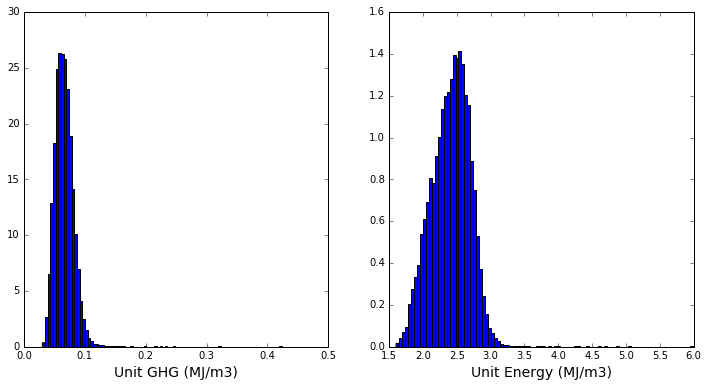

In [35]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2, 1)
plt.hist(Total_GHG_m3,bins=100,normed=1)
plt.xlabel('Unit GHG (MJ/m3)',fontsize=14)
plt.xlim(0,0.5)

ax = fig.add_subplot(1, 2, 2)
plt.hist(Total_ENERGY_m3,bins=100,normed=1)
plt.xlabel('Unit Energy (MJ/m3)',fontsize=14)



In [36]:
describe(Total_GHG_m3)

DescribeResult(nobs=15001L, minmax=(0.030241219909716531, 0.46762280682553509), mean=0.066330120508999668, variance=0.00037356602433714957, skewness=6.13124284138983, kurtosis=88.72290283441806)

In [37]:
describe(Total_ENERGY_m3)

DescribeResult(nobs=15001L, minmax=(1.6013976921097797, 5.9983136292753532), mean=2.4082907580848425, variance=0.081743443099954016, skewness=0.26121786072679437, kurtosis=3.326939325232118)